In [1]:
from sstadex import Macromodel, bfs, Primitive, dfs, simplediffpair, cs_pmos, cm_pmos
import numpy as np
from sympy import Symbol
import matplotlib.pyplot as plt

XSCHEM_RCFILE = "/opt/pdks/sky130A/libs.tech/xschem/xschemrc"
SPICE_DIR = "./spice/"
OUTPUT_DIR = "./output/"
XSCHEM_DIR = "./xschem/"

In [2]:
OTA_macro = Macromodel(name = "ota",
                       macromodel_parameters={Symbol('Ra'): np.linspace(100, 100000, 5),
                                              Symbol('gma'): np.linspace(0.001, 0.1, 5)},
                       req_tfs = [["vout", "vpos"]],
                       electrical_parameters={Symbol("gdif_2"): Symbol("gdif_1"),
                                              Symbol("Rdif_2"): Symbol("Rdif_1"),
                                              Symbol("V1"): 0,
                                              Symbol("V_n"): 0,
                                              Symbol("V_p"): 1,
                                              Symbol("I2"): 0})

vs = np.linspace(0, 0.8, 5)
vds_diffpar = 1.2 - vs
vgs_diffpar = 0.9 - vs

parametros_electricos = {'Vds': vds_diffpar, 'Vsb': 0, 'Vgs': vgs_diffpar}

diffpair_primitive = simplediffpair(netlist='simplediffpair.spice', type='nmos', inputs={'vds_lut': (0.1, 1.2, 0.01), 'vgs_lut': (0.1, 1.8, 0.01), 'vds': parametros_electricos['Vds'], 'vgs': parametros_electricos['Vgs'], 'il': 20e-6,
                  'length': [0.4e-06, 0.8e-06, 1.6e-06, 3.2e-06, 6.4e-6], '2d_var': ['vds', 'vgs']})

diffpair_primitive.build()

diffpair_primitive.parameters = {Symbol("Rdif_1"): np.asarray(diffpair_primitive.Ro).flatten(), 
                                 Symbol("gdif_1"): np.asarray(diffpair_primitive.gm).flatten()}

active_load = Macromodel(name = "activeLoad",
                         macromodel_parameters = {Symbol("Raload_1"): np.linspace(100, 100000, 5),
                                                  Symbol("Raload_2"): np.linspace(100, 100000, 5),
                                                  Symbol("gaload"): np.linspace(0.001, 0.1, 5)})

current_source = Macromodel(name = "currentSource")


OTA_macro.submacromodels = [active_load, current_source]
OTA_macro.primitives = [diffpair_primitive]

results, axes = dfs(OTA_macro)

vds
vgs
1
Macro results of:  ota
Running MNA... 



   X server connection failed, although DISPLAY shell variable is set.
   A possible reason is that the X server is not running or DISPLAY shell variable
   is incorrectly set.
   Starting Xschem in text only mode.



   net1  vs  vneg  vout  vpos  vss  vdd
0     1   2     3     4     5    0    6
A:  Matrix([[1/Rdif_2 + 1/Raload_2, -gdif_2 - 1/Rdif_2, gdif_2, 0, 0, -1/Raload_2, 0, 0, 0], [-1/Rdif_2, gdif_1 + gdif_2 + 1/Rdif_2 + 1/Rdif_1, -gdif_2, -1/Rdif_1, -gdif_1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [gaload, -gdif_1 - 1/Rdif_1, 0, 1/Rdif_1 + 1/Raload_1, gdif_1, -gaload - 1/Raload_1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [-gaload - 1/Raload_2, 0, 0, -1/Raload_1, 0, gaload + 1/Raload_2 + 1/Raload_1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0]])
[v1, v2, v3, v4, v5, v6, I_V1, I_V_n, I_V_p]
{I_V1: -I2, I_V_n: 0, I_V_p: 0, v1: (-I2*Raload_1*Raload_2*Rdif_2*gdif_2 - I2*Raload_1*Raload_2 - I2*Raload_2*Rdif_1*Rdif_2*gdif_2 - I2*Raload_2*Rdif_1 + Raload_1*Raload_2*Rdif_2*V1*gaload*gdif_2 + Raload_1*Raload_2*V1*gaload + Raload_1*Rdif_2*V1*gdif_2 + Raload_1*V1 - Raload_2*Rdif_1*Rdif_2*V_n*gdif_1*gdif_2 + Raload_2*Rdif_1*Rdif_2*V_p*gdif_1*gdif_2 + Ral


   X server connection failed, although DISPLAY shell variable is set.
   A possible reason is that the X server is not running or DISPLAY shell variable
   is incorrectly set.
   Starting Xschem in text only mode.



{I_V1: -I2, I_V_n: 0, I_V_p: 0, v1: (-I2*Raload_1*Raload_2*Rdif_2*gdif_2 - I2*Raload_1*Raload_2 - I2*Raload_2*Rdif_1*Rdif_2*gdif_2 - I2*Raload_2*Rdif_1 + Raload_1*Raload_2*Rdif_2*V1*gaload*gdif_2 + Raload_1*Raload_2*V1*gaload + Raload_1*Rdif_2*V1*gdif_2 + Raload_1*V1 - Raload_2*Rdif_1*Rdif_2*V_n*gdif_1*gdif_2 + Raload_2*Rdif_1*Rdif_2*V_p*gdif_1*gdif_2 + Raload_2*Rdif_1*V_p*gdif_1 + Raload_2*Rdif_2*V1*gdif_2 - Raload_2*Rdif_2*V_n*gdif_2 + Raload_2*V1 + Rdif_1*Rdif_2*V1*gdif_1 + Rdif_1*Rdif_2*V1*gdif_2 + Rdif_1*V1 + Rdif_2*V1)/(Raload_1*Raload_2*Rdif_2*gaload*gdif_2 + Raload_1*Raload_2*gaload + Raload_1*Rdif_2*gdif_2 + Raload_1 + Raload_2*Rdif_1*gdif_1 + Raload_2 + Rdif_1*Rdif_2*gdif_1 + Rdif_1*Rdif_2*gdif_2 + Rdif_1 + Rdif_2), v2: (-I2*Raload_1*Raload_2 - I2*Raload_1*Rdif_2 - I2*Raload_2*Rdif_1 - I2*Rdif_1*Rdif_2 + Raload_1*Raload_2*Rdif_2*V_n*gaload*gdif_2 + Raload_1*Raload_2*V1*gaload + Raload_1*Rdif_2*V_n*gdif_2 + Raload_1*V1 + Raload_2*Rdif_1*V_p*gdif_1 + Raload_2*V1 + Rdif_1*Rdif_2


   X server connection failed, although DISPLAY shell variable is set.
   A possible reason is that the X server is not running or DISPLAY shell variable
   is incorrectly set.
   Starting Xschem in text only mode.



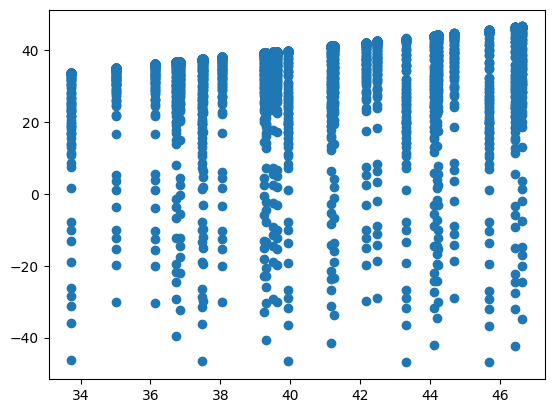

In [3]:
results[0] = np.asarray(results[0])

Ra = []
gma = []

for i in axes:
    for j in i[3]:
        Ra.append(j)
    for j in i[4]:
        gma.append(j)

gain = 20*np.log10(np.asarray(Ra)*np.asarray(gma))

plt.scatter(gain, results[0].flatten())

In [4]:
ota_cm_pmos = cm_pmos(name='ota_cm_pmos', netlist='pmos_cm.spice', type='pmos', inputs={'vds_lut': -0.6, 'vgs_lut': (-1.8, -0.1, 0.01), 'vgs': -0.6, 'il': 20e-6,
                  'length': [0.4e-06, 0.8e-06, 1.6e-06, 3.2e-06, 6.4e-6], '2d_var': ['length', 'vgs']})
ota_cm_pmos.build()

ota_cm_pmos.parameters = {Symbol("Raload_1"): np.asarray(ota_cm_pmos.Ro).flatten(),
                          Symbol("Raload_2"): 1/np.asarray(ota_cm_pmos.gm).flatten(),
                          Symbol("gaload"): np.asarray(ota_cm_pmos.gm).flatten()}

length
vgs
0


In [5]:
ota_cm_pmos.parameters

{Raload_1: array([  89293.86710451,  200487.25589248,  466473.67042742,
         965620.34777063, 1853233.05438004]),
 Raload_2: array([6741.18608982, 4704.83754533, 4422.018974  , 4551.56315538,
        4475.30392015]),
 gaload: array([0.00014834, 0.00021255, 0.00022614, 0.0002197 , 0.00022345])}

In [6]:
OTA_macro.submacromodels = []
OTA_macro.primitives = [diffpair_primitive, ota_cm_pmos]

results_1, axes_1 = dfs(OTA_macro)

Macro results of:  ota
Running MNA... 
   net1  vs  vneg  vout  vpos  vss  vdd
0     1   2     3     4     5    0    6
A:  Matrix([[1/Rdif_2 + 1/Raload_2, -gdif_2 - 1/Rdif_2, gdif_2, 0, 0, -1/Raload_2, 0, 0, 0], [-1/Rdif_2, gdif_1 + gdif_2 + 1/Rdif_2 + 1/Rdif_1, -gdif_2, -1/Rdif_1, -gdif_1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [gaload, -gdif_1 - 1/Rdif_1, 0, 1/Rdif_1 + 1/Raload_1, gdif_1, -gaload - 1/Raload_1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [-gaload - 1/Raload_2, 0, 0, -1/Raload_1, 0, gaload + 1/Raload_2 + 1/Raload_1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0]])
[v1, v2, v3, v4, v5, v6, I_V1, I_V_n, I_V_p]



   X server connection failed, although DISPLAY shell variable is set.
   A possible reason is that the X server is not running or DISPLAY shell variable
   is incorrectly set.
   Starting Xschem in text only mode.



{I_V1: -I2, I_V_n: 0, I_V_p: 0, v1: (-I2*Raload_1*Raload_2*Rdif_2*gdif_2 - I2*Raload_1*Raload_2 - I2*Raload_2*Rdif_1*Rdif_2*gdif_2 - I2*Raload_2*Rdif_1 + Raload_1*Raload_2*Rdif_2*V1*gaload*gdif_2 + Raload_1*Raload_2*V1*gaload + Raload_1*Rdif_2*V1*gdif_2 + Raload_1*V1 - Raload_2*Rdif_1*Rdif_2*V_n*gdif_1*gdif_2 + Raload_2*Rdif_1*Rdif_2*V_p*gdif_1*gdif_2 + Raload_2*Rdif_1*V_p*gdif_1 + Raload_2*Rdif_2*V1*gdif_2 - Raload_2*Rdif_2*V_n*gdif_2 + Raload_2*V1 + Rdif_1*Rdif_2*V1*gdif_1 + Rdif_1*Rdif_2*V1*gdif_2 + Rdif_1*V1 + Rdif_2*V1)/(Raload_1*Raload_2*Rdif_2*gaload*gdif_2 + Raload_1*Raload_2*gaload + Raload_1*Rdif_2*gdif_2 + Raload_1 + Raload_2*Rdif_1*gdif_1 + Raload_2 + Rdif_1*Rdif_2*gdif_1 + Rdif_1*Rdif_2*gdif_2 + Rdif_1 + Rdif_2), v2: (-I2*Raload_1*Raload_2 - I2*Raload_1*Rdif_2 - I2*Raload_2*Rdif_1 - I2*Rdif_1*Rdif_2 + Raload_1*Raload_2*Rdif_2*V_n*gaload*gdif_2 + Raload_1*Raload_2*V1*gaload + Raload_1*Rdif_2*V_n*gdif_2 + Raload_1*V1 + Raload_2*Rdif_1*V_p*gdif_1 + Raload_2*V1 + Rdif_1*Rdif_2

In [7]:
OTA_macro.submacromodels

[]

In [13]:
axes_1[0][1]

array([2.36055988e+06, 2.36055988e+06, 2.36055988e+06, 2.36055988e+06,
       2.36055988e+06, 2.36055988e+06, 2.36055988e+06, 2.36055988e+06,
       2.36055988e+06, 2.36055988e+06, 2.36055988e+06, 2.36055988e+06,
       2.36055988e+06, 2.36055988e+06, 2.36055988e+06, 1.51590684e+06,
       1.51590684e+06, 1.51590684e+06, 1.51590684e+06, 1.51590684e+06,
       1.51590684e+06, 1.51590684e+06, 1.51590684e+06, 1.51590684e+06,
       1.51590684e+06, 1.51590684e+06, 1.51590684e+06, 1.51590684e+06,
       1.51590684e+06, 1.51590684e+06, 6.54341914e+05, 6.54341914e+05,
       6.54341914e+05, 6.54341914e+05, 6.54341914e+05, 6.54341914e+05,
       6.54341914e+05, 6.54341914e+05, 6.54341914e+05, 6.54341914e+05,
       6.54341914e+05, 6.54341914e+05, 6.54341914e+05, 6.54341914e+05,
       6.54341914e+05, 2.85183445e+05, 2.85183445e+05, 2.85183445e+05,
       2.85183445e+05, 2.85183445e+05, 2.85183445e+05, 2.85183445e+05,
       2.85183445e+05, 2.85183445e+05, 2.85183445e+05, 2.85183445e+05,
      

In [14]:
results_1[0] = np.asarray(results_1[0]).flatten()
results_1[0].shape

(300,)

In [9]:
len(axes_1[0])

5

In [17]:
test = np.asarray(axes_1[0]).reshape(2, 15, 50)
test_2 = test[1]
test_2
#np.transpose(test_2).reshape(2, -1)[1]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [15]:
Ra = []
gma = []

for i in axes_1[0][0]:
        Ra.append(i)
for i in axes_1[0][1]:
        gma.append(i)

len(Ra)
len(gma)

300

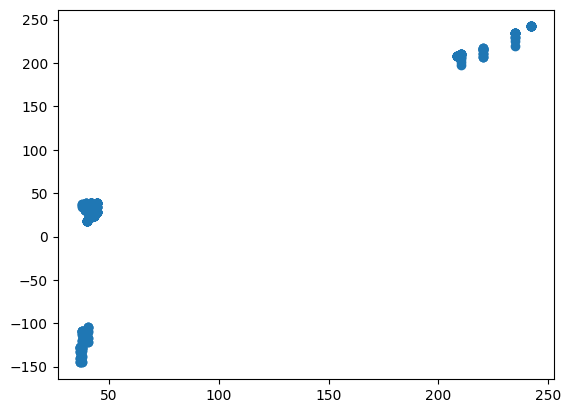

In [16]:
gain = 20*np.log10(np.asarray(Ra)*np.asarray(gma))

plt.scatter(gain, results_1[0].flatten())

In [ ]:
pt = Primitive(name = "passTransistor", 
               parameters = {Symbol('gm_pt'): np.linspace(0.001, 0.1, 5), 
                             Symbol('Ro_pt'): np.linspace(100, 100000, 5)})

LDO_macro = Macromodel(name = "ldo", 
                       submacromodels = [OTA_macro],
                       req_tfs = [["vout", "net1"]], 
                       primitives = [pt], 
                       electrical_parameters={Symbol("V1"): 1, 
                                              Symbol("V2"): 0, 
                                              Symbol("R2"): 100000, 
                                              Symbol("R3"): 300000})

results, axes = dfs(LDO_macro)

In [41]:
a = np.asarray([[1, 2, 3, 4], [5, 6, 7, 8]])
b = np.asarray([[2, 3, 4, 5], [7, 6, 7, 8], [9, 10, 11, 12]])

c = np.meshgrid(a, b)
d = np.meshgrid(a, b, indexing="ij")

In [42]:
c_2 = np.asarray(c[1])
c_2.shape

(12, 8)

In [43]:
c_2.reshape(3, -1)

array([[ 2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
         4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,  6,
         7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
        11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12]])

In [39]:
c_2 = np.asarray(c[0])
c_2.shape
c_2

array([[1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8]])

In [30]:
c = np.asarray(c)
c[1] = c[1].transpose()
c.reshape(5, -1)

ValueError: could not broadcast input array from shape (8,12) into shape (12,8)

In [19]:
e = np.asarray([d[0], c[1]])
print(e)
print(e.shape)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.